# K means algorithm : 

### K-means Clustering Algorithm

K-means is a method for automatically grouping similar data points together. 
Specifically, you have a training set, and you want to cluster the data into a few coherent "clusters." 

K-means is an iterative procedure that:

1. Starts by guessing the initial centroids.
2. Refines this guess by:
   a. Repeatedly assigning examples to their closest centroids.
   b. Recalculating the centroids based on the assignments.

#### Pseudocode for the K-means Algorithm

```
1. Choose the number of clusters K.
2. Initialize K centroids randomly from the dataset.
3. Repeat until convergence:
   a. Assign each data point to the nearest centroid.
   b. Update the centroids by calculating the mean of the assigned points.
```

In [ ]:
# Initialize centroids
# K is the number of clusters
centroids = kMeans_init_centroids(X, K)
for iter in range(iterations):
    # Cluster assignment step:
    # Assign each data point to the closest centroid.
    # idx[i] corresponds to the index of the centroid
    # assigned to example i
    idx = find_closest_centroids(X, centroids)
    # Move centroid step:
    # Compute means based on centroid assignments
    centroids = compute_means(X, idx, K)

### K-means Algorithm: Internal Loop

The internal loop of the algorithm repeatedly performs two steps:

i. Assigning each training example to its closest centroid, and

ii. Recalculating the mean of each centroid using the points assigned to it.

The K-means algorithm always converges to a final set of means for the centroids. 
However, the converged solution may not always be ideal and depends on the initial configuration of the centroids. 

Therefore, in practice, the K-means algorithm is generally run multiple times with different random initializations. 
One way to choose between these different solutions from various random initializations is to select the one with the lowest cost function value (distortion).

You will implement the two phases of the K-means algorithm separately in the following sections.


### K-means Algorithm: Finding Closest Centroid

In the "cluster assignment step" of the K-means algorithm, the algorithm assigns each training example to its closest centroid, given the current positions of the centroids.
#
## Exercise 1

Your task is to complete the code in the `find_closest_centroids` function.

- This function takes the data matrix `X` and the locations of all centroids in `centroids`.
- It should produce a one-dimensional array `idx` (which has the same number of elements as `X`) that contains the index of the closest centroid (a value in {1, … , K}, where K is the total number of centroids) for each training example.

More specifically, for each example \( x^{(i)} \), we define:

$$
c^{(i)} \leftarrow j \text{ which minimizes } \| x^{(i)} - \mu_j \|
$$

where:
- \( c^{(i)} \) is the index of the closest centroid to \( x^{(i)} \) (corresponding to `idx[i]` in the starting code), and
- \( \mu_j \) is the position (value) of the j-th centroid (stored in `centroids` in the starting code).
the starting code).



In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def find_closest_centroids(X, centroids):
    '''
    X: the data
    centroids : the centroids in k means
    Return : an matrix that contient the index have the minimum distances 
    '''
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m, dtype=int)
    for i in range(m):
        dist= []
        for j in range(k):
            nurm = np.linalg.norm(X[i] - centroids[j])
            dist.append(nurm)
        idx[i] = np.argmin(dist)

    return idx
        

In [5]:
X = np.genfromtxt(r'C:\Users\hp\Downloads\Unlabelled_dataset.csv', delimiter=',', skip_header=1)

In [8]:
X = X[:, :2]

In [9]:
X.shape

(1166, 2)

In [10]:
X

array([[4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       ...,
       [5.7, 5.1],
       [5.1, 5.7],
       [nan, 5.1]])

In [11]:
X = X[~np.isnan(X).any(axis=1)]

In [13]:
X = X[:, ~np.isnan(X).any(axis=0)]

In [15]:
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
 [[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]]
The shape of X is: (1149, 2)


In [18]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])
# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)
# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [1 0 0]


### K-means Algorithm: Computing Centroids

After assigning each point to a centroid, the second phase of the algorithm recalculates the mean of the points assigned to each centroid.

## Exercise 2

Please complete the `compute_centroids` function below to recalculate the value of each centroid.

- More specifically, for each centroid \( \mu_k \), we define:

$$
\mu_k = \frac{1}{|C_k|} \sum_{x^{(i)} \in C_k} x^{(i)}
$$

where:
- \( C_k \) is the set of examples assigned to centroid \( k \)
- \( |C_k| \) is the number of examples in the set \( C_k \)

### Explanation

Concretely, if two examples, say \( x^{(D)} \) and \( x^{(E)} \), are assigned to centroid \( k = 2 \), then you should update:

$$
\mu_2 = \frac{1}{2} (x^{(D)} + x^{(E)})
$$

This process involves calculating the average of all data points assigned to each centroid to find their new positions.


In [21]:
def compute_centroids(X, idx, K):
    '''
    X : the data 
    idx: contient the label correct for each case in X 
    k : the number of clusters
    Return: the avrage of each centroid
    '''
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)

    return centroids

In [22]:
K = 3
centroids = compute_centroids(X, idx, K)
print("The centroids are:", centroids)

The centroids are: [[4.675      4.11336207]
 [5.18502304 3.54308756]
 [5.4438247  4.99482072]]


## The run Kmeans function :

In [38]:
def plotProgresskMeans(X, centroids, previous_centroids, idx, k, i):
	""" Plot the progress when running k-means

	Parameters
	---------------
	X : numpy.ndarray
	centroid, previous_centroids : numpy.ndarray
	idx : numpy.ndarray
	      centroid assignment of examples
	k : int
	    number of centroids
	i : iteration number

	Return
	---------------
	None
	"""

	plot_data_points(X, idx, k)

	plt.scatter(centroids[:,0], centroids[:,1], marker='x', 
		        s = 70, c='k')

	for j in range( centroids.shape[0] ):
		plt.plot([ centroids[j,0], previous_centroids[j,0] ],
		         [ centroids[j,1], previous_centroids[j,1] ], c='b')

	plt.title('Iteration %d' % (i+1))
	plt.draw()
	plt.pause(0.01)

In [39]:
def plot_data_points(X, idx, k):
	""" Plot data points, coloring them so that points with the same
	    centroid assignments have the same color

	Parameters
	------------
	idx : numpy.ndarray
	      Centroid assignment, idx[i] is the centroid of 
	      the example i-th in X
	k : int
	      The number of centroids
	"""

	plt.scatter(X[:,0], X[:,1], c=idx, marker='^', s=30)

In [40]:
def run_kmeans(X, inial_centroids, max_iter = 10, plot_progress = False):
    '''
    X : the origin data
    inial_centroids : the inial centroids from X 
    max _iter : the maximum 
    Return : the clusters
    '''
    m, n = X.shape
    k = inial_centroids.shape[0]
    centroides = inial_centroids
    previous_centroides = centroides
    idx = np.zeros(m)
    for i in range(max_iter):
        print("K-Means iteration %d/%d" % (i, max_iters - 1))
        idx = find_closest_centroids(X, centroides)
        if plot_progress:
            plotProgresskMeans(X, centroides, previous_centroides, idx, k,i)
            previous_centroides = centroides
        centroides = compute_centroids(X, idx, k)
    plt.show()
    return centroides, idx

K-Means iteration 0/9


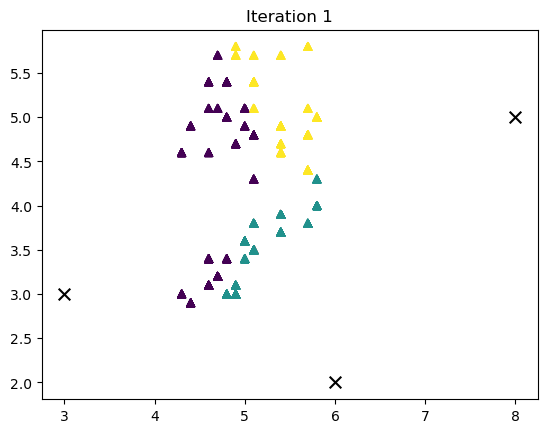

K-Means iteration 1/9


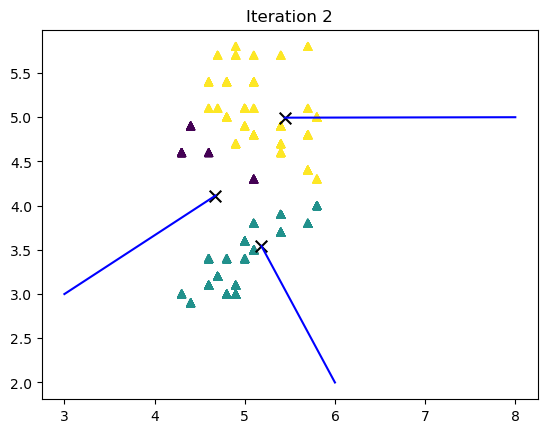

K-Means iteration 2/9


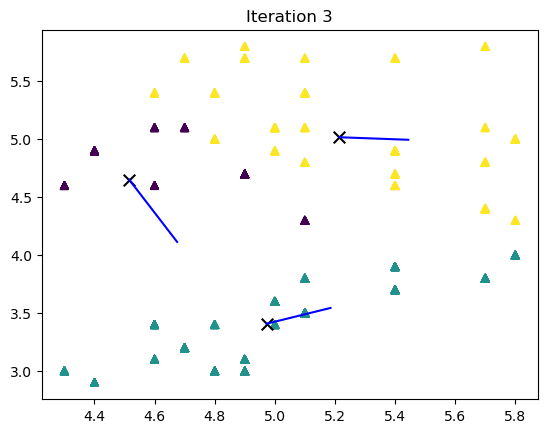

K-Means iteration 3/9


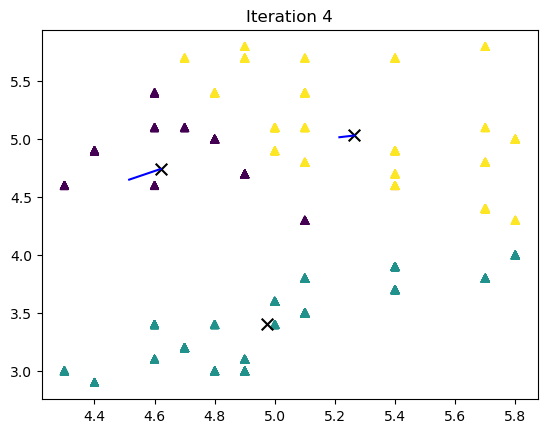

K-Means iteration 4/9


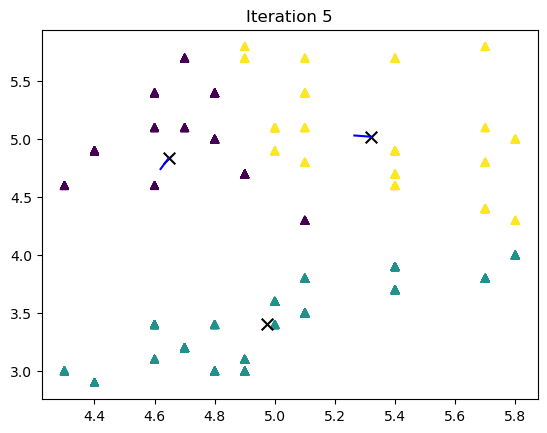

K-Means iteration 5/9


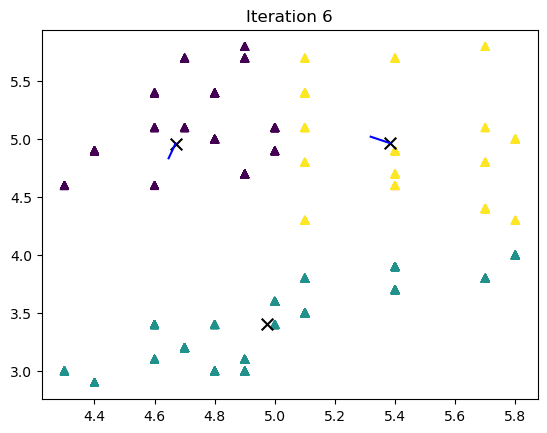

K-Means iteration 6/9


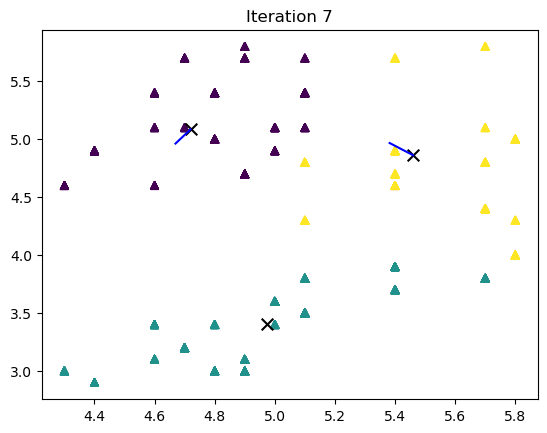

K-Means iteration 7/9


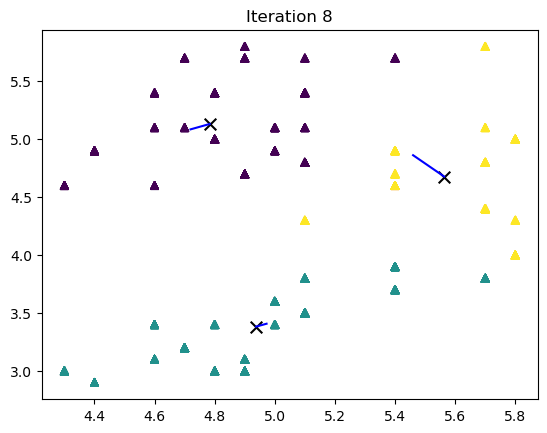

K-Means iteration 8/9


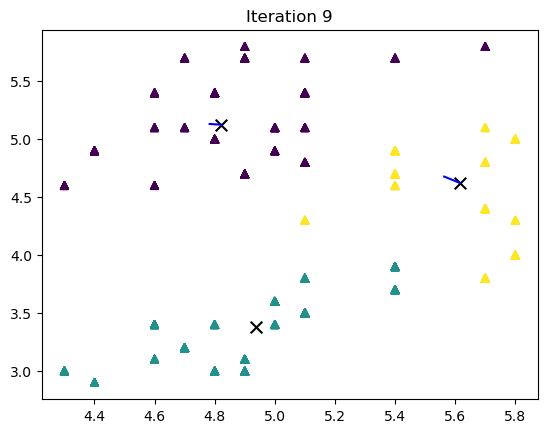

K-Means iteration 9/9


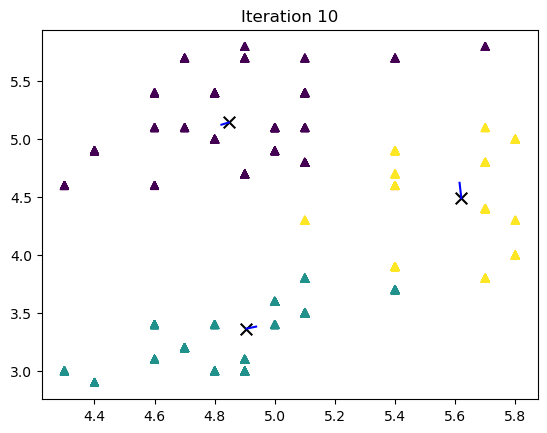

In [42]:
# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3
# Number of iterations
max_iters = 10
centroids, idx = run_kmeans(X, initial_centroids, max_iters, plot_progress=True)

### Random initialisation : 

In practice, a common strategy for initializing centroids in the K-means algorithm is to randomly select examples from the training set. This helps start the clustering process randomly and avoids selecting the same example twice.

## kMeans_init_centroids Function

The `kMeans_init_centroids` function works as follows:

1. It starts by randomly shuffling the indices of the examples using `np.random.permutation()`.
2. Then, it selects the first examples based on the random permutation of indices. This ensures that the examples are randomly selected without the risk of selecting the same example more than once.



In [43]:
def kMeans_init_centroids(X, K):
    '''
    X : the data
    k : the number of clasters
    return : the centroids
    '''
    r = np.random.permutation(X.shape[0])
    centroids = X[r[:k]]
    return centroids

K-Means iteration 0/9


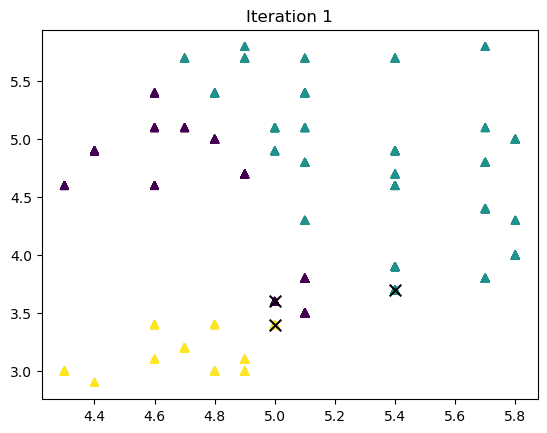

K-Means iteration 1/9


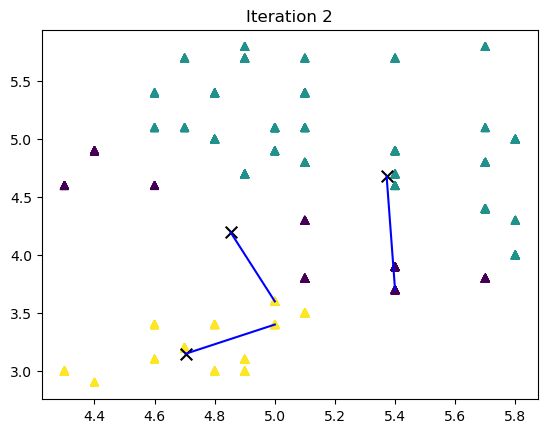

K-Means iteration 2/9


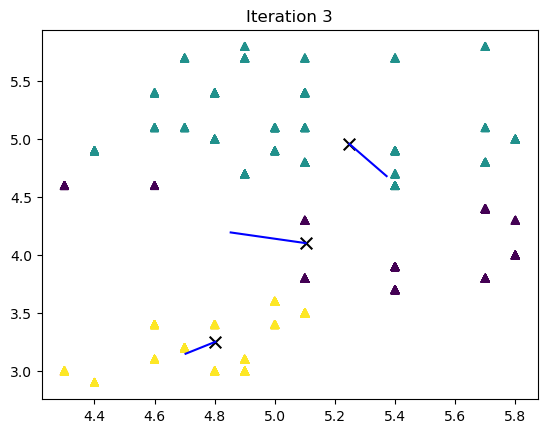

K-Means iteration 3/9


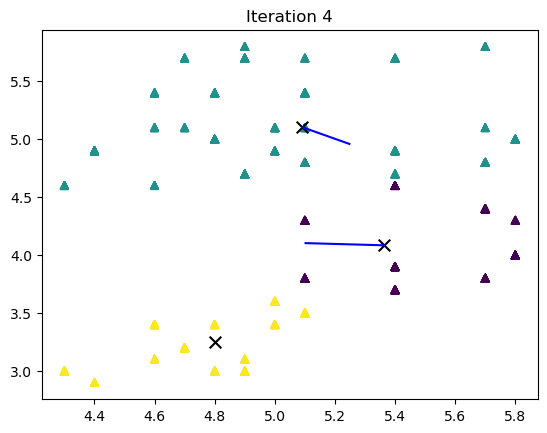

K-Means iteration 4/9


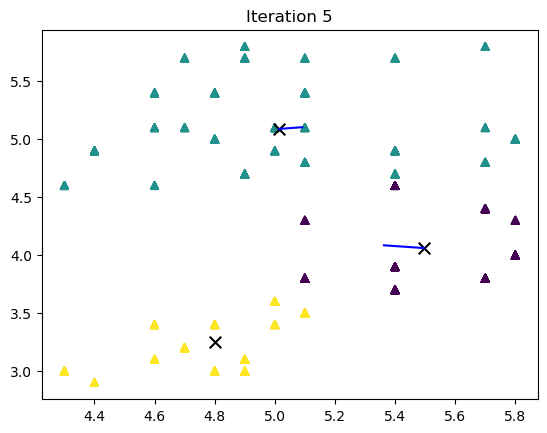

K-Means iteration 5/9


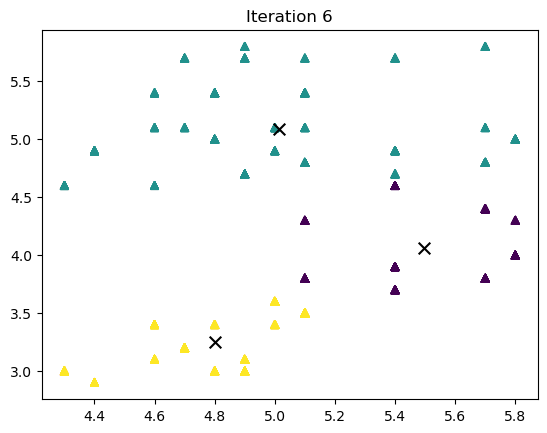

K-Means iteration 6/9


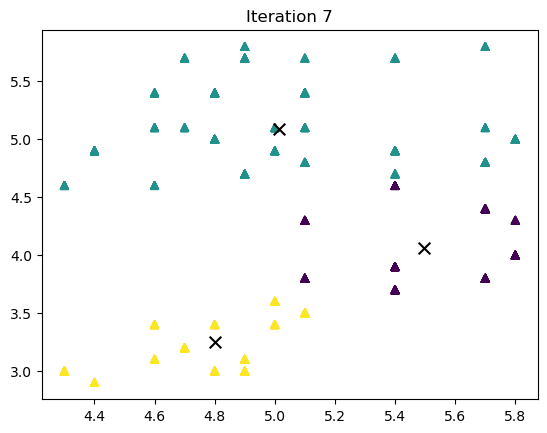

K-Means iteration 7/9


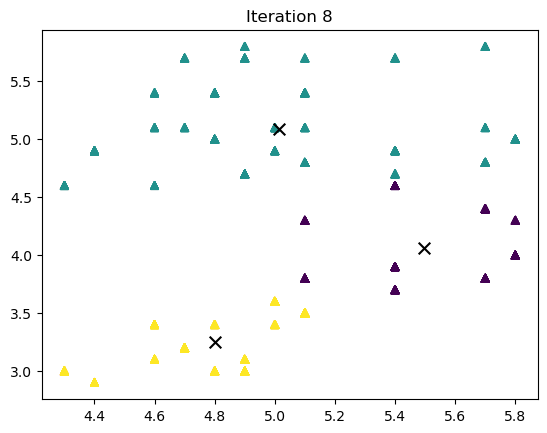

K-Means iteration 8/9


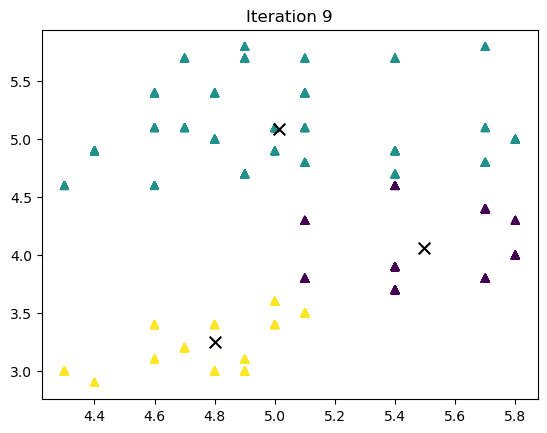

K-Means iteration 9/9


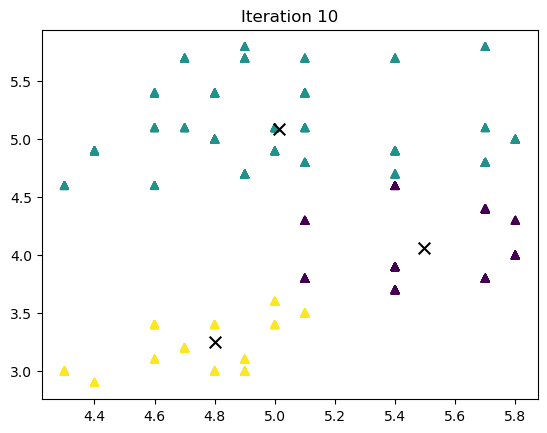

In [44]:
#example using the random iitailisations :
k = 3
initial_centroids = kMeans_init_centroids(X, k)
# Number of iterations
max_iters = 10
centroids, idx = run_kmeans(X, initial_centroids, max_iters, plot_progress=True)

# Image Compression with K-means

In this exercise, you will apply K-means to image compression. 

In a simple 24-bit color representation of an image, each pixel is represented by three 8-bit unsigned integers (ranging from 0 to 255), which specify the red, green, and blue intensity values. This encoding is often referred to as RGB encoding.

Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16. By doing this reduction, it is possible to represent (compress) the photo more efficiently.

## Compression Process

More specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image, you only need to store the index of the color at that location (where only 4 bits are needed to represent 16 possibilities).

### Steps Overview:

1. **Image as Data Points**: You will treat each pixel of the original image as a data point and use the K-means algorithm to find 16 colors that best group the pixels in the 3D RGB space.
   
2. **Use K-means for Color Reduction**: Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

### Dataset and Image Loading

In [46]:
original_img = plt.imread(r'C:\Users\hp\Downloads\b.png')

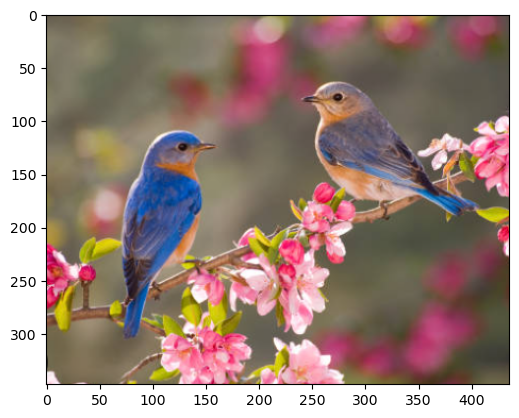

In [47]:
# Visualizing the image
plt.imshow(original_img)

In [51]:
# image shape : RGBA (A the transparence)
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (348, 436, 3)


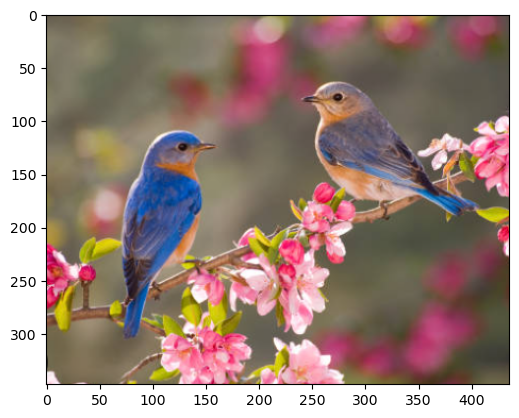

In [52]:
if original_img.shape[2] == 4:
    original_img = original_img[:, :, :3]  # Keep only the RGB channels

# Display the RGB image
plt.imshow(original_img)
plt.show()

In [53]:
#RGB representation 
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (348, 436, 3)


In [54]:
## Rechaping the image :
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255
# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 348 x 436
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.
X_img = np.reshape(original_img, (original_img.shape[0] *
original_img.shape[1], 3))

In [55]:
X_img.shape

(151728, 3)

### using K means to find the 16 best colors 


In [58]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10
# Using the function you have implemented above.
initial_centroids = kMeans_init_centroids(X_img, K)
# Run K-Means - this takes a couple of minutes
centroids, idx = run_kmeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


K-Means iteration 0/9


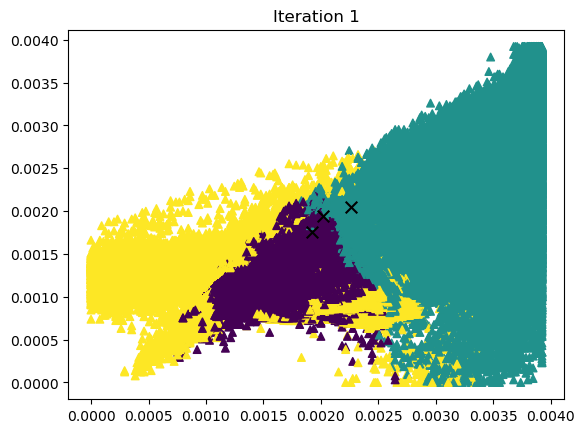

K-Means iteration 1/9


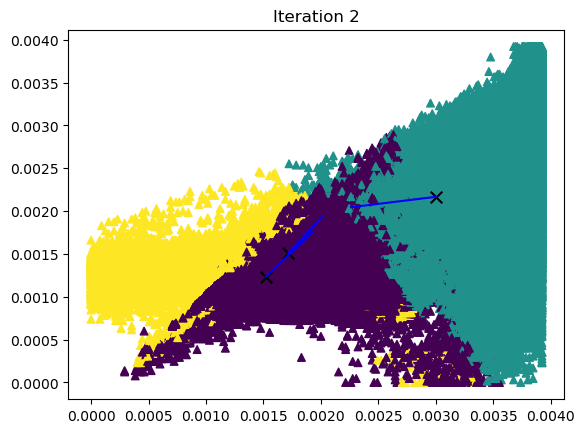

K-Means iteration 2/9


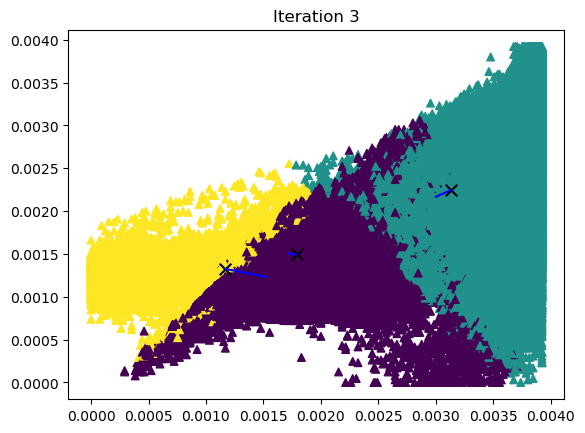

K-Means iteration 3/9


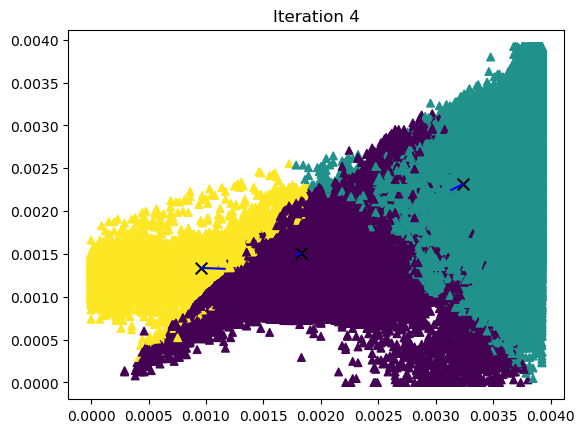

K-Means iteration 4/9


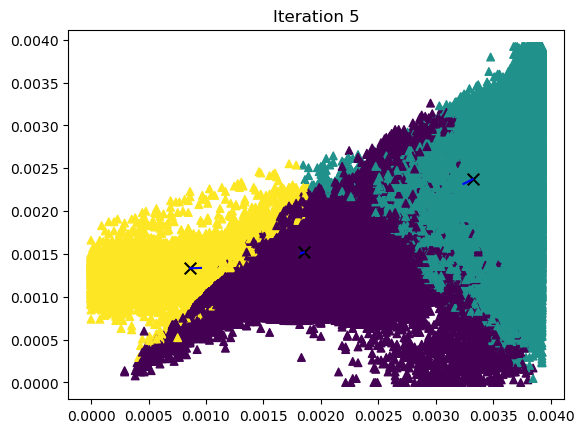

K-Means iteration 5/9


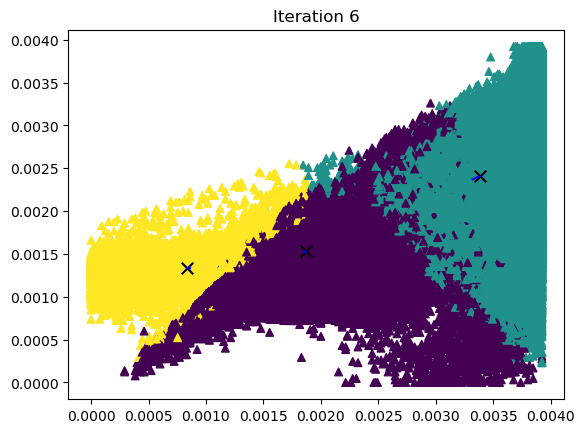

K-Means iteration 6/9


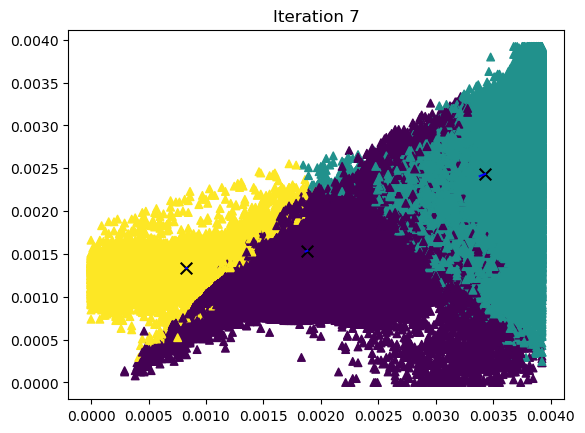

K-Means iteration 7/9


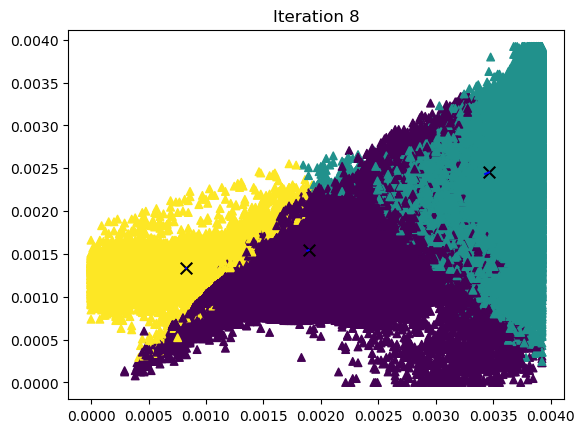

K-Means iteration 8/9


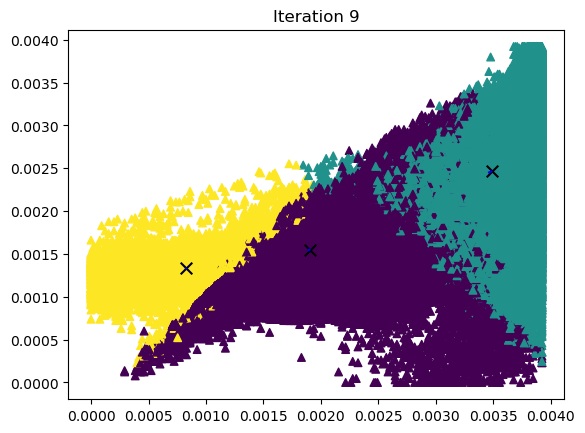

K-Means iteration 9/9


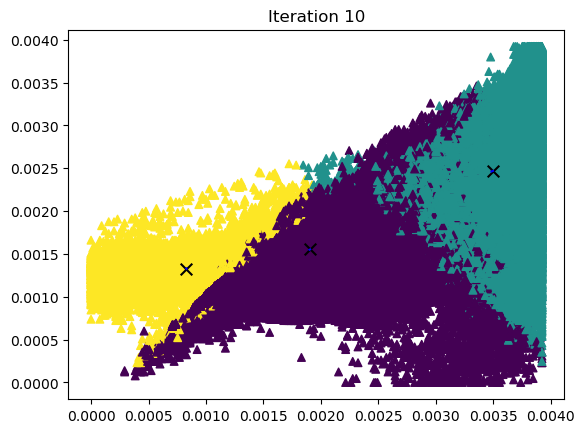

In [59]:
centroids, idx = run_kmeans(X_img, initial_centroids, max_iters, plot_progress=True)

# Image Compression using K-means

After identifying the **K=16** primary colors to represent the image, you can now assign each pixel position to its nearest centroid using the `find_closest_centroids` function. This allows you to represent the original image using the centroid assignments for each pixel.

## Key Points:

1. **Reduction in Bit Representation**: 
   - Originally, each pixel in the image required 24 bits to store the Red, Green, and Blue (RGB) values.
   - Now, each pixel is represented by the index of its closest centroid, which requires only **4 bits** (since we have 16 centroids, and \( \log_2(16) = 4 \)).

2. **Original Image Size**:
   - For an image of size **384 x 436**, the original bit size would be:
   \[
   128 \times 128 \times 24 = 393,216 \text{ bits}
   \]
   
3. **Compressed Image Representation**:
   - The compressed image requires:
     - **16 colors** to be stored (centroids), and each of these colors needs 24 bits (RGB).
     - The image itself needs **4 bits** per pixel for the centroid index.

   - The total size of the compressed image is:
   \[
   16 \times 24 + 128 \times 128 \times 4 = 65,920 \text{ bits}
   \]

4. **Compression Factor**:
   - The compression factor is the ratio between the original image size and the compressed image size:
   \[
   \frac{393,216}{65,920} \approx 6
   \]
   - Therefore, the image is compressed by approximately **a factor of 6**.



In [60]:
# Represent image in terms of indices
X_recovered = centroids[idx, :]
# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')
ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()
# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()
plt.show()

In [106]:
original_img = plt.imread(r'C:\Users\hp\Downloads\qpng.png')

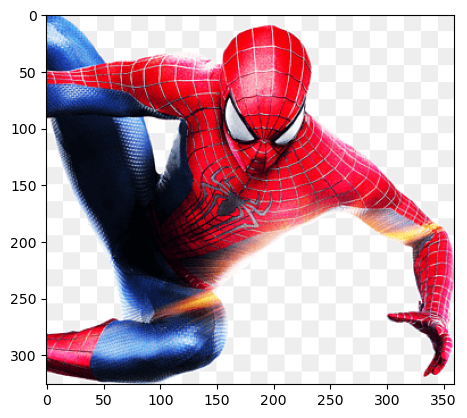

In [107]:
# Visualizing the image
plt.imshow(original_img)

In [108]:
# image shape : RGBA (A the transparence)
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (326, 360, 4)


In [109]:
## Rechaping the image :
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255
# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 348 x 436
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.
X_img = np.reshape(original_img, (original_img.shape[0] *
original_img.shape[1], 4))

In [110]:
X_img.shape

(117360, 4)

In [111]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10
# Using the function you have implemented above.
initial_centroids = kMeans_init_centroids(X_img, K)
# Run K-Means - this takes a couple of minutes
centroids, idx = run_kmeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [112]:
# Represent image in terms of indices
X_recovered = centroids[idx, :]
# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')
ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()
# Display compressed image
ax[1].imshow(X_recovered * 25)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()
plt.show()